# PROJECT : Movie Recommandation System
## Goal : 
- Create a Movie Recommendation System using content-based filtering. Content-based filtering uses item features to recommend other items similar to what the user likes, based on their previous actions or explicit feedback

# 1. Data set Information

- **movies_metadata.csv:** The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.

- **keywords.csv:** Contains the movie plot keywords for our MovieLens movies. Available in the form of a stringified JSON Object.

- **credits.csv:** Consists of Cast and Crew Information for all our movies. Available in the form of a stringified JSON Object.

## 1.0 Import Data sets

In [23]:
import pandas as pd
import seaborn as sns
import warnings
import numpy as np
import matplotlib.pyplot as plt
import ast

# Ignorer tous les avertissements
warnings.filterwarnings('ignore')

In [87]:
# Load data
movies_metadata = pd.read_csv('datasets\movies_metadata.csv')
keywords = pd.read_csv('datasets\keywords.csv')
credits = pd.read_csv('datasets\credits.csv')

### Check Shape

In [88]:
print("Meta data shape :", movies_metadata.shape)
print("Keyword shape :", keywords.shape)
print("Credit shape :", credits.shape)

Meta data shape : (45466, 24)
Keyword shape : (46419, 2)
Credit shape : (45476, 3)


## 1.2 Overview of data sets

In [26]:
#data movie 
movies_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [27]:
#keyword data
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [28]:
#credits data
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


## 1.3 Merge 3 data sets into one

In [29]:
#we need to convert 'id' from movie_metadata to numeric
movies_metadata['id'] = pd.to_numeric(movies_metadata['id'], errors='coerce')
movies_metadata.id.dtype

dtype('float64')

In [30]:
# Merge dataframes based on movie ID
movies = pd.merge(movies_metadata, keywords, on='id')
movies = pd.merge(movies, credits, on='id')

In [31]:
#data merged overview
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,keywords,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844.0,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602.0,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357.0,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862.0,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [32]:
#check basic info
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46628 entries, 0 to 46627
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  46628 non-null  object 
 1   belongs_to_collection  4574 non-null   object 
 2   budget                 46628 non-null  object 
 3   genres                 46628 non-null  object 
 4   homepage               8009 non-null   object 
 5   id                     46628 non-null  float64
 6   imdb_id                46611 non-null  object 
 7   original_language      46617 non-null  object 
 8   original_title         46628 non-null  object 
 9   overview               45633 non-null  object 
 10  popularity             46624 non-null  object 
 11  poster_path            46229 non-null  object 
 12  production_companies   46624 non-null  object 
 13  production_countries   46624 non-null  object 
 14  release_date           46540 non-null  object 
 15  re

In [33]:
#num variable distribution
movies.describe()

,id,revenue,runtime,vote_average,vote_count
count,46628.000000,4.662400e+04,46360.000000,46624.000000,46624.000000
mean,109678.820837,1.102765e+07,94.086885,5.611728,108.169719
std,112908.126984,6.380526e+07,38.454015,1.932157,486.429314
min,2.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,26760.250000,0.000000e+00,85.000000,5.000000,3.000000
50%,61299.000000,0.000000e+00,95.000000,6.000000,10.000000
75%,159624.000000,0.000000e+00,107.000000,6.800000,34.000000
max,469172.000000,2.787965e+09,1256.000000,10.000000,14075.000000


# 2. PRE PROCESSING

In [34]:
#drop useless column
movies=movies[['id','original_title','overview','genres','keywords','cast','crew','vote_average','popularity']]
movies.head()

,id,original_title,overview,genres,keywords,cast,crew,vote_average,popularity
0,862.0,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",7.7,21.946943
1,8844.0,Jumanji,When siblings Judy and Peter discover an encha...,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",6.9,17.015539
2,15602.0,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",6.5,11.7129
3,31357.0,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",6.1,3.859495
4,11862.0,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'id': 35, 'name': 'Comedy'}]","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",5.7,8.387519


## 2.1 Check missing values

In [35]:
missing=100*(movies.isna().sum()/movies.shape[0]).sort_values(ascending=False)
print("Missing value percentage by variable")
print("\n")
print(missing)

Missing value percentage by variable


overview          2.133911
vote_average      0.008579
popularity        0.008579
id                0.000000
original_title    0.000000
genres            0.000000
keywords          0.000000
cast              0.000000
crew              0.000000
dtype: float64


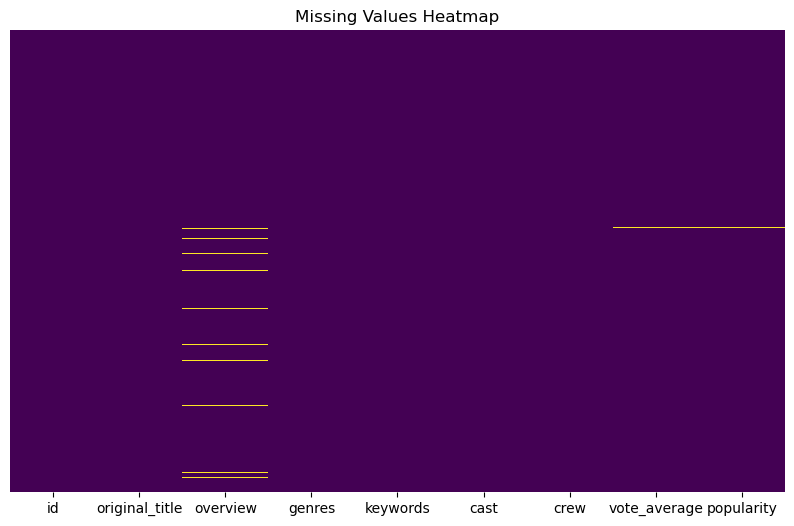

In [36]:
# Generate a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(movies.isnull(), cmap='viridis', cbar=False, yticklabels=False)

plt.title('Missing Values Heatmap')
plt.show()

## 2.2 Convert JSON variables to list

In [37]:
# Convert stringified JSON to lists
movies['genres'] = movies['genres'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])
movies['keywords'] = movies['keywords'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])
movies['crew'] = movies['crew'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])
movies['cast'] = movies['cast'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

In [38]:
#transform to a list of words
movies['genres'] = movies['genres'].apply(lambda x: [genre['name'] for genre in x] if x else [])
movies['keywords'] = movies['keywords'].apply(lambda x: [keyword['name'] for keyword in x] if x else [])
movies['crew'] = movies['crew'].apply(lambda x: [crew_member['name'] for crew_member in x] if x else [])
movies['cast'] = movies['cast'].apply(lambda x: [cast_member['name'] for cast_member in x] if x else [])

### Convert missing 'overview' to an empty string

In [39]:
# Convert missing 'overview' values to empty string
movies['overview'].fillna('', inplace=True)

# Split 'overview' into a list of words
movies['overview'] = movies['overview'].apply(lambda x: x.split())

- Convert popularity to numeric
- imput missing value with the mean for both popularity and vote_average

In [40]:
#convert popularity to numeric
movies['popularity'] = movies['popularity'].replace(',', '', regex=True)
movies['popularity'] = pd.to_numeric(movies['popularity'], errors='coerce')

In [41]:
# Calculer la moyenne pour 'popularity' et 'vote_average'
popularity_mean = movies['popularity'].mean()
vote_average_mean = movies['vote_average'].mean()

In [42]:
# Remplacer les valeurs manquantes par la moyenne respective
movies['popularity'].fillna(popularity_mean, inplace=True)
movies['vote_average'].fillna(vote_average_mean, inplace=True)

In [43]:
# Display a few rows to check the changes
movies.head()

,id,original_title,overview,genres,keywords,cast,crew,vote_average,popularity
0,862.0,Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,...","[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[John Lasseter, Joss Whedon, Andrew Stanton, J...",7.7,21.946943
1,8844.0,Jumanji,"[When, siblings, Judy, and, Peter, discover, a...","[Adventure, Fantasy, Family]","[board game, disappearance, based on children'...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[Larry J. Franco, Jonathan Hensleigh, James Ho...",6.9,17.015539
2,15602.0,Grumpier Old Men,"[A, family, wedding, reignites, the, ancient, ...","[Romance, Comedy]","[fishing, best friend, duringcreditsstinger, o...","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[Howard Deutch, Mark Steven Johnson, Mark Stev...",6.5,11.712900
3,31357.0,Waiting to Exhale,"[Cheated, on,, mistreated, and, stepped, on,, ...","[Comedy, Drama, Romance]","[based on novel, interracial relationship, sin...","[Whitney Houston, Angela Bassett, Loretta Devi...","[Forest Whitaker, Ronald Bass, Ronald Bass, Ez...",6.1,3.859495
4,11862.0,Father of the Bride Part II,"[Just, when, George, Banks, has, recovered, fr...",[Comedy],"[baby, midlife crisis, confidence, aging, daug...","[Steve Martin, Diane Keaton, Martin Short, Kim...","[Alan Silvestri, Elliot Davis, Nancy Meyers, N...",5.7,8.387519


### 2.4 Define a function to remove spaces between names for "crew" and "cast"

In [44]:
# Define a function to remove spaces between names in a list
def remove_spaces(names_list):
    return [''.join(person.split()) for person in names_list]

In [45]:
# Apply the function to the 'crew' variable
movies['crew'] = movies['crew'].apply(remove_spaces)
movies['cast'] = movies['cast'].apply(remove_spaces)

In [50]:
#check some output
print(movies['crew'][0:4])
print("\n")
print(movies['cast'][0:4])

0    [JohnLasseter, JossWhedon, AndrewStanton, Joel...
1    [LarryJ.Franco, JonathanHensleigh, JamesHorner...
2    [HowardDeutch, MarkStevenJohnson, MarkStevenJo...
3    [ForestWhitaker, RonaldBass, RonaldBass, EzraS...
Name: crew, dtype: object


0    [TomHanks, TimAllen, DonRickles, JimVarney, Wa...
1    [RobinWilliams, JonathanHyde, KirstenDunst, Br...
2    [WalterMatthau, JackLemmon, Ann-Margret, Sophi...
3    [WhitneyHouston, AngelaBassett, LorettaDevine,...
Name: cast, dtype: object


## 2.5 Combine all meaning full variables (categorical) into one : tags

In [51]:
# Combine relevant features into a new variable
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [52]:
#keeps only meaningful variable
movies_df=movies[['id','original_title','tags','vote_average','popularity']]

In [53]:
movies_df.head()

,id,original_title,tags,vote_average,popularity
0,862.0,Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,...",7.7,21.946943
1,8844.0,Jumanji,"[When, siblings, Judy, and, Peter, discover, a...",6.9,17.015539
2,15602.0,Grumpier Old Men,"[A, family, wedding, reignites, the, ancient, ...",6.5,11.712900
3,31357.0,Waiting to Exhale,"[Cheated, on,, mistreated, and, stepped, on,, ...",6.1,3.859495
4,11862.0,Father of the Bride Part II,"[Just, when, George, Banks, has, recovered, fr...",5.7,8.387519


- Convert tags variable to a string 
- Lower case tags strings

In [54]:
#convert tags to a string and lowercase
movies_df['tags']=movies_df['tags'].apply(lambda x: " ".join(x))
movies_df['tags']=movies_df['tags'].apply(lambda x: x.lower())

In [56]:
#print one example 
print(movies_df['tags'][0])

led by woody, andy's toys live happily in his room until andy's birthday brings buzz lightyear onto the scene. afraid of losing his place in andy's heart, woody plots against buzz. but when circumstances separate buzz and woody from their owner, the duo eventually learns to put aside their differences. animation comedy family jealousy toy boy friendship friends rivalry boy next door new toy toy comes to life tomhanks timallen donrickles jimvarney wallaceshawn johnratzenberger anniepotts johnmorris erikvondetten lauriemetcalf r.leeermey sarahfreeman pennjillette johnlasseter josswhedon andrewstanton joelcohen alecsokolow bonniearnold edcatmull ralphguggenheim stevejobs leeunkrich ralpheggleston robertgordon maryhelenleasman kimblanchette marilynmccoppen randynewman dalee.grahn robincooper johnlasseter petedocter joeranft patsybouge normdecarlo ashbrannon randynewman romanfigun dondavis jamesflamberg marybethsmith rickmackay susanbradley williamreeves randynewman andrewstanton petedocter

## 2.6 Pre process TEXT & num varaible for word embedding

In [58]:
import nltk
from nltk.corpus import stopwords
import numpy as np
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import MinMaxScaler
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity

In [59]:
# Télécharger le modèle punkt
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gatsu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [60]:
# Load pre-trained GloVe model 
glove_model = KeyedVectors.load_word2vec_format('glove.6B.200d.txt', binary=False,no_header=True)

In [61]:
#define stop words
stop_words = set(stopwords.words('english'))

#define a function to preprocess the text
def preprocess_text_glove(text, model, stop_words):
    tokens = word_tokenize(text.lower())
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    tokens = [word for word in tokens if word not in stop_words]

    # Use the pre-trained GloVe model to obtain word vectors
    word_vectors = [model[word] for word in tokens if word in model]

    # Aggregate word vectors into a single vector representative of the document
    if word_vectors:
        doc_vector = np.mean(word_vectors, axis=0)
    else:
        doc_vector = np.zeros(model.vector_size)
    
    return doc_vector

### 2.7 Apply preprocess to variable "tags"

In [63]:
# Apply the preprocessing function to your 'tags' column
movies_df['glove_vectors'] = movies_df['tags'].apply(lambda x: preprocess_text_glove(x, glove_model, stop_words))

# Create an array from the list of vectors
glove_vectors_array = np.array(movies_df['glove_vectors'].to_list())

### 2.8 normalize "vote_average" and "popularity" 

In [64]:
# Normalisation de 'vote_average' et 'popularity'
scaler = MinMaxScaler()
movies_df[['normalized_vote_average', 'normalized_popularity']] = scaler.fit_transform(movies_df[['vote_average', 'popularity']])

In [65]:
# Concatenate features
features = np.concatenate([glove_vectors_array,
                           movies_df['normalized_vote_average'].to_numpy().reshape(-1, 1),
                           movies_df['normalized_popularity'].to_numpy().reshape(-1, 1)], axis=1)

# Assign the new features to your DataFrame
movies_df['combined_features'] = list(features)

In [69]:
#overview of the combined features
movies_df['combined_features'][0].shape

(202,)

### 2.9 For each rows, we have an array representing the variables we embedded (202 total)
- 200 from our pre-trained glove model we applied into our "tags" variable
- 2 from normalized popularity / vote_average

# 3. Modelisation & Recommandation

In [79]:
# transforming our array into list so we have 202 columns representing each vectors dimensions
feature_matrix = np.array(movies_df['combined_features'].to_list())

In [73]:
#check shape
feature_matrix.shape

(46628, 202)

In [74]:
# Calculate cosine similarity
cosine_sim_matrix = cosine_similarity(feature_matrix, feature_matrix)

In [75]:
# Convert the cosine similarity matrix to a DataFrame for better readability (it's optional)
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=movies_df['original_title'], columns=movies_df['original_title'])
cosine_sim_df.head()

original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II,Heat,Sabrina,Tom and Huck,Sudden Death,GoldenEye,...,House of Horrors,Shadow of the Blair Witch,The Burkittsville 7,Caged Heat 3000,Robin Hood,رگ خواب,Siglo ng Pagluluwal,Betrayal,Satana likuyushchiy,Queerama
original_title,,,,,,,,,,,,,,,,,,,,,
Toy Story,1.000000,0.923083,0.886122,0.912423,0.873167,0.861423,0.901540,0.888564,0.849342,0.778674,...,0.821365,0.786937,0.740219,0.877510,0.883098,0.836364,0.809034,0.839717,0.839655,0.791333
Jumanji,0.923083,1.000000,0.878533,0.911313,0.887825,0.878725,0.895178,0.885476,0.886240,0.832921,...,0.841007,0.812925,0.759373,0.926475,0.898981,0.842106,0.798462,0.872163,0.870263,0.829500
Grumpier Old Men,0.886122,0.878533,1.000000,0.889636,0.864275,0.829203,0.896649,0.878009,0.792382,0.763083,...,0.806830,0.777194,0.718666,0.856675,0.855747,0.824587,0.757733,0.810579,0.851331,0.790835
Waiting to Exhale,0.912423,0.911313,0.889636,1.000000,0.907115,0.894991,0.929792,0.910245,0.863718,0.796674,...,0.864713,0.825067,0.782441,0.899976,0.905689,0.885069,0.812264,0.865948,0.898755,0.843843
Father of the Bride Part II,0.873167,0.887825,0.864275,0.907115,1.000000,0.817336,0.901457,0.862174,0.843398,0.780872,...,0.791262,0.776989,0.705675,0.877692,0.842476,0.842743,0.736494,0.820300,0.901388,0.845839


In [80]:
#define a function to recommend a movie based on cosine similarity score

def recommend_top_movies(movie_title, top_n):
    # Get the index of the movie in the DataFrame
    movie_index = movies_df.index[movies_df['original_title'] == movie_title].tolist()[0]

    # Get the cosine similarity scores for the specified movie
    cosine_sim_scores = cosine_sim_matrix[movie_index]

    # Get the indices of the top-n most similar movies (excluding the movie itself)
    similar_movie_indices = cosine_sim_scores.argsort()[:-top_n-3:-1]

    # Get the movie titles corresponding to the indices (excluding the movie itself)
    similar_movie_titles = movies_df['original_title'].iloc[similar_movie_indices].tolist()

    # Remove the input movie from the recommendations (if it's in the list)
    similar_movie_titles = [title for title in similar_movie_titles if title != movie_title]

    return similar_movie_titles[:top_n]

In [86]:
# Example: Get top 10 movie recommendations for a movie titled 'Spider-Man 2'
recommend_top_movies('Spider-Man', top_n=10)

['Spider-Man 3',
 'Doctor Strange',
 'Spider-Man 2',
 'X-Men: The Last Stand',
 'Superman/Batman: Apocalypse',
 'Batman Returns',
 'Look, Up in the Sky: The Amazing Story of Superman',
 'The Amazing Spider-Man',
 'Iron Man',
 'Guardians of the Galaxy Vol. 2']

# 4. SAVE models for flask app

In [89]:
import joblib

# Save the model
joblib.dump(cosine_sim_matrix, 'movie_cosine_similarity_model.pkl')

['movie_cosine_similarity_model.pkl']